In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import contextily as ctx
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import pandas as pd
import numpy as np

**PIEDMONT DATA FROM GEOPORTAL**

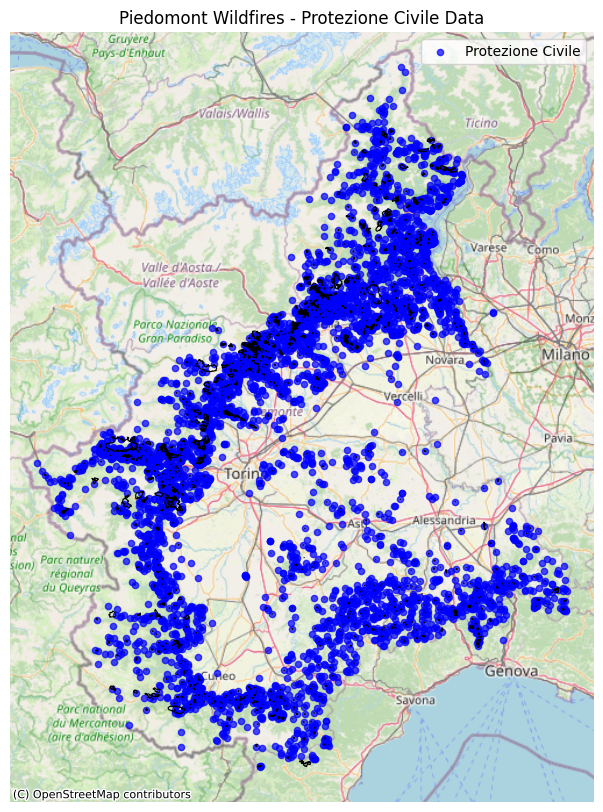

In [7]:

#Piedmont Protezione Civile Fire Areas
piedmont_fa = gpd.read_file("../shp_scarico_geoportale/INC_SDO_PL_INCENDI.shp")  

#Piedmont Protezione Civile Fire Points
piedmont_fp = gpd.read_file("../shp_scarico_geoportale/INC_SDO_PT_INCENDIO.shp")


#Convert to EPSG:3857 (CRS of OpenStreetMap/Google Maps)
piedmont_fa=piedmont_fa.to_crs(epsg=3857)
piedmont_fp= piedmont_fp.to_crs(epsg=3857)

#Plot
fig, ax = plt.subplots(figsize=(12, 10))

#Boudary
piedmont_fa.boundary.plot(ax=ax, color="black", linewidth=0.8)

#FIRE POINTS
piedmont_fp.plot(ax=ax, color="blue", markersize=20, label="Protezione Civile", alpha=0.7)

#BASEMAP
ctx.add_basemap(
    ax=ax,
    source=ctx.providers.OpenStreetMap.Mapnik,  
    zoom=8 )


plt.title("Piedomont Wildfires - Protezione Civile Data")
plt.legend()
plt.axis("off")  # Nascondi gli assi
plt.show()


Cutting Piedomont from EFFIS Json (run only to get the new file)

In [ ]:
effis = gpd.read_file("../EFFIS_IT_EL_FR_PT_2021_2024\EFFIS_IT_EL_FR_PT_2021_2024.json")

#Filtering for piedmont data
effis_piedmont = effis[
    (effis["country"] == "Italia") & 
    (
        (effis["admlvl1"].str.contains("Piemonte", case=False)) |
        (effis["admlvl2"].str.contains("Piemonte", case=False))
    )
]
effis_piedmont=effis_piedmont.to_crs(epsg=3857)

effis_piedmont.to_file("effis_piedmont.geojson", driver="GeoJSON")

Converting XLS in CSV

In [3]:
excel_file = pd.read_excel(
    "shp_scarico_geoportale\INCENDI_T_INCENDIO.xls", 
    engine='xlrd'
)

# Converti in CSV
excel_file.to_csv("shp_scarico_geoportale\INCENDI_T_INCENDIO.csv", index=False, encoding='utf-8-sig')

Comparison of different data

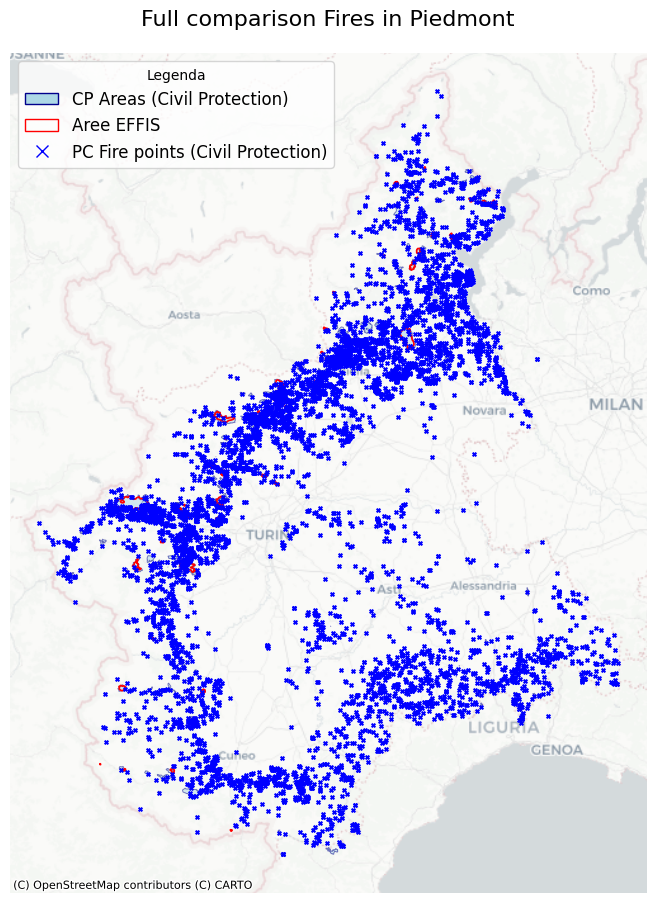

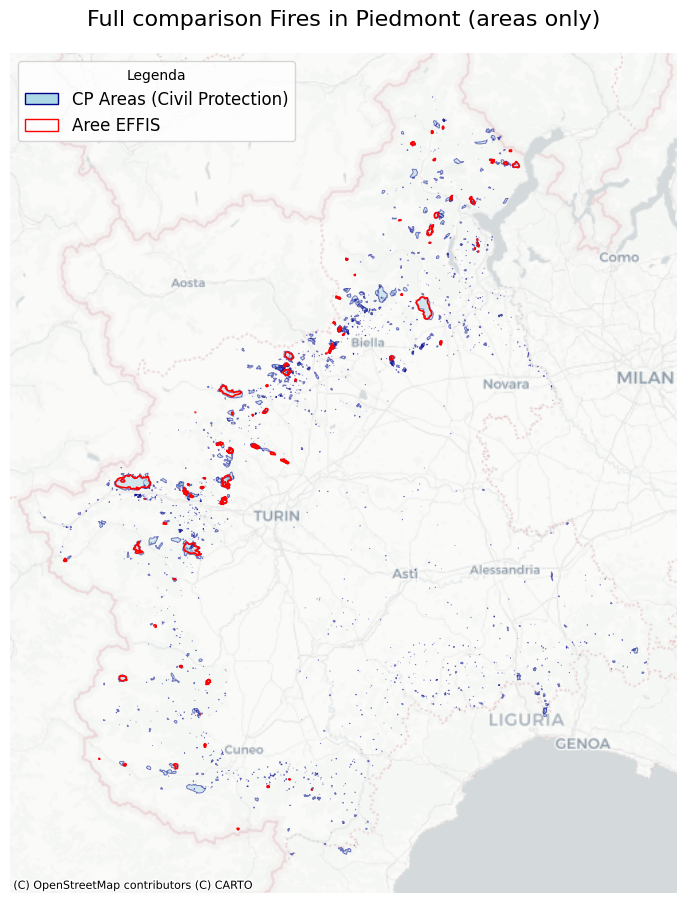

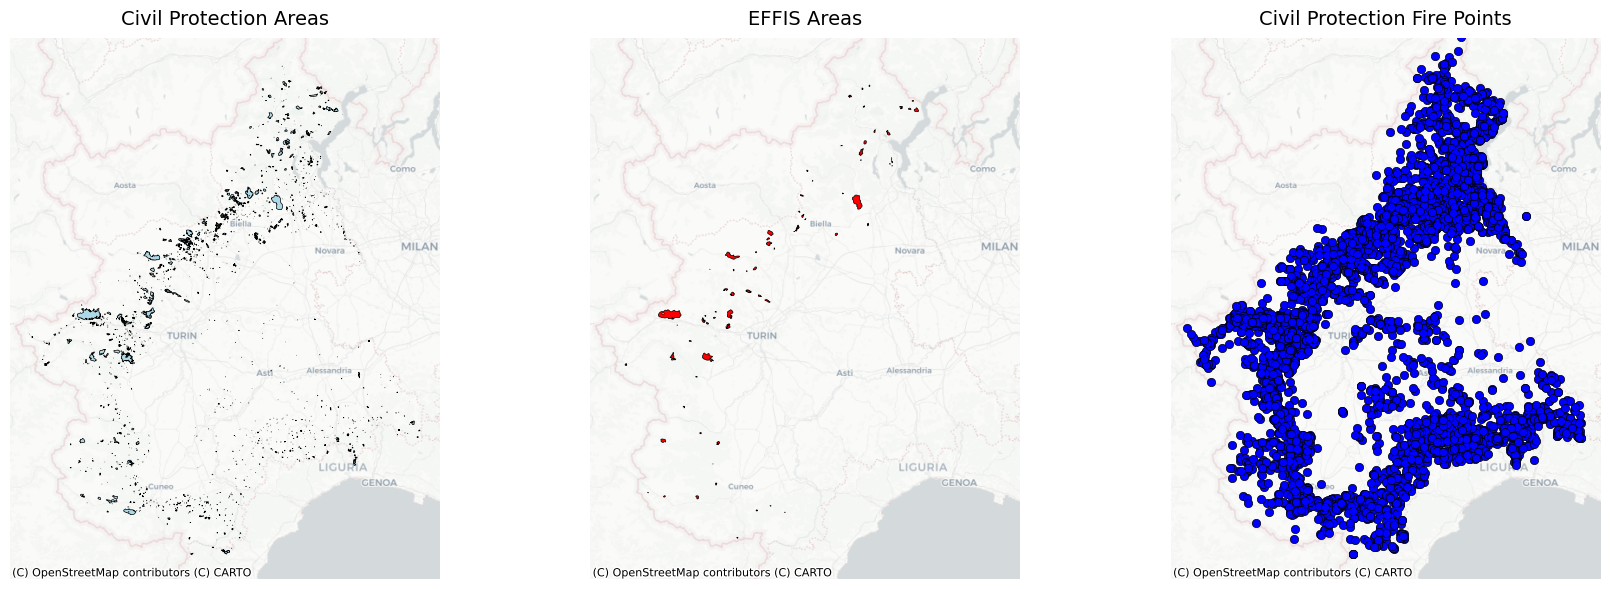

In [ ]:

#####Composed Map
effis_piedmont=gpd.read_file("shp_cp_2012_2024/effis_peidmont.geojson")
fig = plt.figure(figsize=(18, 20))
gs = gridspec.GridSpec(2, 1, height_ratios=[1.5, 1])


ax_main = fig.add_subplot(gs[0])

#1. Fire areas Civil Protection
piedmont_fa.plot(
    ax=ax_main,
    facecolor="lightblue",
    edgecolor="darkblue",
    alpha=0.5,
    linewidth=0.7
)

#2. EFFIS fire areas
effis_piedmont.plot(
    ax=ax_main,
    facecolor="none",
    edgecolor="red",
    linewidth=1.2
)

#3. Civil Protection Fire  Points
piedmont_fp.plot(
    ax=ax_main,
    color="blue",
    markersize=7,
    marker="x"
)

# Base map and title
ctx.add_basemap(ax_main, source=ctx.providers.CartoDB.Positron, zoom=8)
ax_main.set_title("Full comparison Fires in Piedmont", fontsize=16, pad=20)
ax_main.axis("off")

#MANUAL LEGEND
legend_elements = [
    mpatches.Patch(facecolor="lightblue", edgecolor="darkblue", label="CP Areas (Civil Protection)"),
    mpatches.Patch(facecolor="none", edgecolor="red", label="Aree EFFIS"),
    mlines.Line2D([], [], color="blue", marker="x", markersize=8, linestyle="None", label="PC Fire points (Civil Protection)")
]

ax_main.legend(handles=legend_elements, loc='upper left', frameon=True, fontsize=12, title="Legenda")

#####Composed Map only AREAS
fig1 = plt.figure(figsize=(18, 20))
gs1 = gridspec.GridSpec(2, 1, height_ratios=[1.5, 1])


ax_main1 = fig1.add_subplot(gs[0])

#1. Fire areas Civil Protection
piedmont_fa.plot(
    ax=ax_main1,
    facecolor="lightblue",
    edgecolor="darkblue",
    alpha=0.5,
    linewidth=0.7
)

#2. EFFIS fire areas
effis_piedmont.plot(
    ax=ax_main1,
    facecolor="none",
    edgecolor="red",
    linewidth=1.2
)


# Base map and title
ctx.add_basemap(ax_main1, source=ctx.providers.CartoDB.Positron, zoom=8)
ax_main1.set_title("Full comparison Fires in Piedmont (areas only)", fontsize=16, pad=20)
ax_main1.axis("off")

#MANUAL LEGEND
legend_elements = [
    mpatches.Patch(facecolor="lightblue", edgecolor="darkblue", label="CP Areas (Civil Protection)"),
    mpatches.Patch(facecolor="none", edgecolor="red", label="Aree EFFIS")]

ax_main1.legend(handles=legend_elements, loc='upper left', frameon=True, fontsize=12, title="Legenda")

#################3 SEPARATE GRAPHS (NEXT TO EACH OTHER)
fig2, ax_sub = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

datasets = [
    (piedmont_fa, "Civil Protection Areas", "lightblue"),
    (effis_piedmont, "EFFIS Areas", "red"),
    (piedmont_fp, "Civil Protection Fire Points", "blue")
    
]

# Plot per ogni dataset
for ax, (data, title, color) in zip(ax_sub, datasets):
    if "Punti" in title:
        data.plot(ax=ax, markersize=10, marker="x", color=color)
    else:
        data.plot(ax=ax, facecolor=color, edgecolor="black", linewidth=0.5)

    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=8)
    ax.set_title(title, fontsize=14, pad=10)
    ax.axis("off")

plt.tight_layout()
plt.show()

Geographic Distribution, Burned Area Dimension

EFFIS area: 13879.3 ha
CP area: 38444.1 ha
Overlapping area: 12451.6 ha
EFFIS only area: 1427.7 ha
PC only area: 25992.5 ha


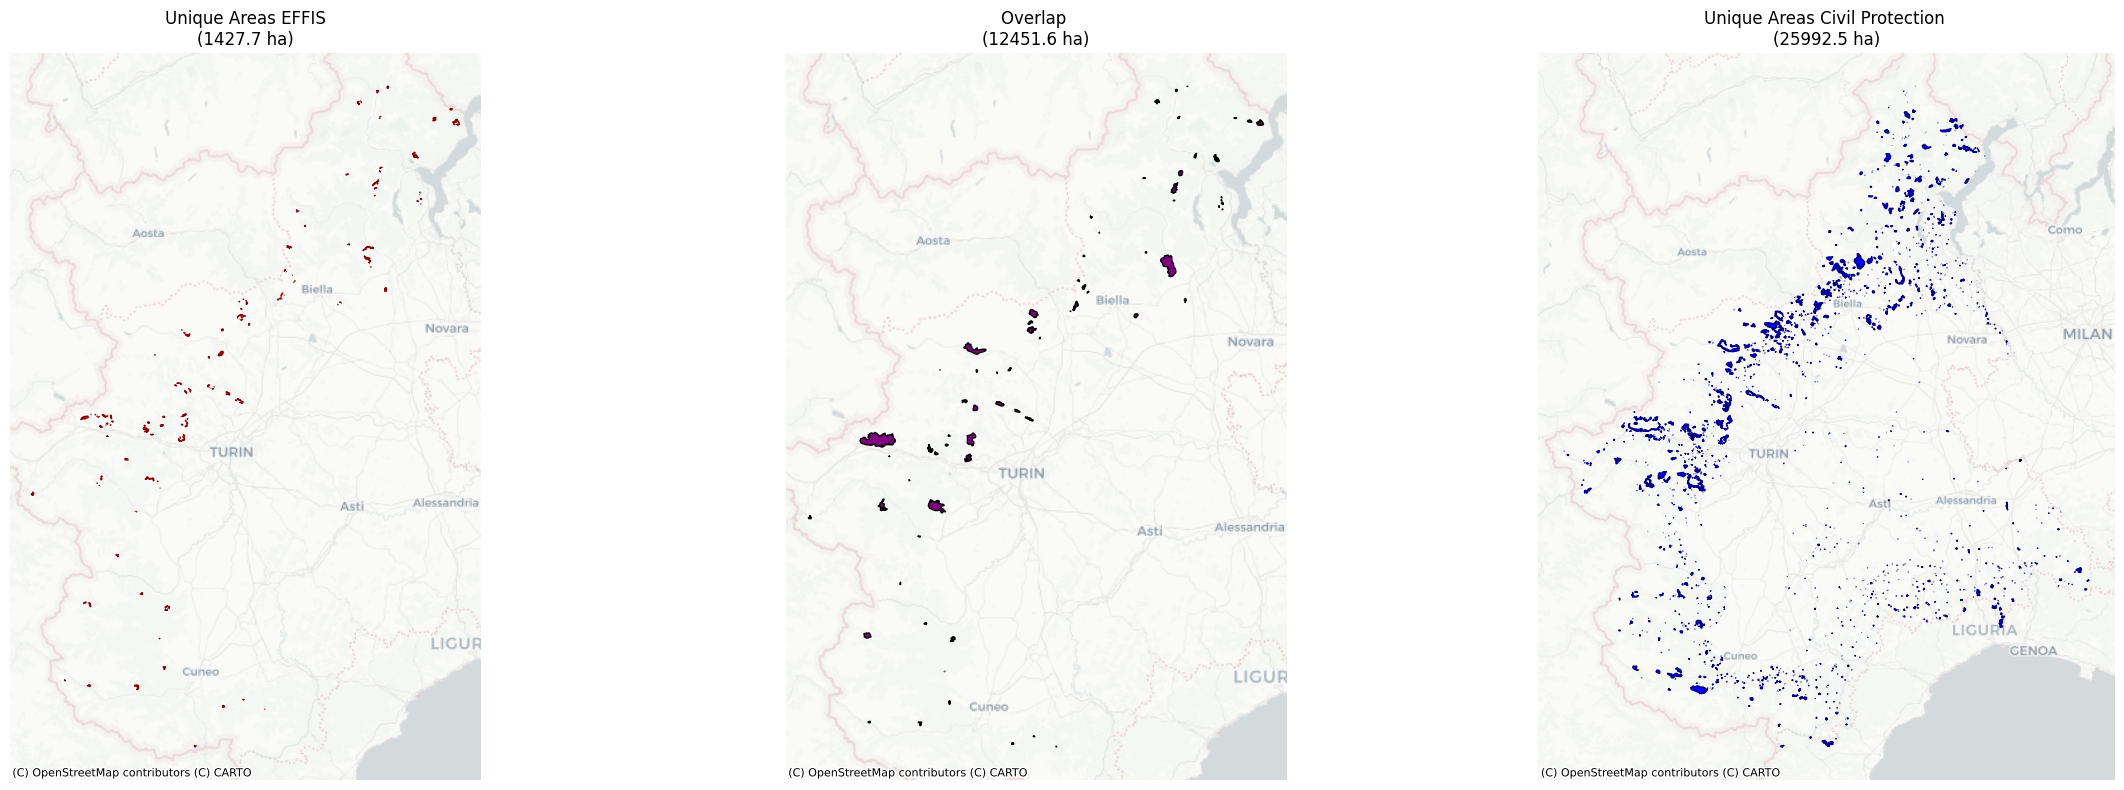

In [ ]:
from shapely.ops import unary_union

#Load data
effis_piedmont = gpd.read_file("shp_cp_2012_2024/effis_piedomont.geojson").to_crs(epsg=32632)
piedmont_fa = gpd.read_file("../shp_scarico_geoportale/INC_SDO_PL_INCENDI.shp").to_crs(epsg=32632)

#Unary Union computation
effis_union = unary_union(effis_piedmont.geometry)
cp_union = unary_union(piedmont_fa.geometry)

#Areas computation
area_effis = effis_union.area / 10_000
area_pc = cp_union.area / 10_000

#Overlapping and unique areas
overlap_geometry = effis_union.intersection(cp_union)
effis_unique_geometry = effis_union.difference(cp_union)
cp_unique_geometry = cp_union.difference(effis_union)

overlap_area = overlap_geometry.area / 10_000
effis_unique = effis_unique_geometry.area / 10_000
cp_unique = cp_unique_geometry.area / 10_000

#Aritmetical results
print(f"EFFIS area: {area_effis:.1f} ha")
print(f"CP area: {area_pc:.1f} ha")
print(f"Overlapping area: {overlap_area:.1f} ha")
print(f"EFFIS only area: {effis_unique:.1f} ha")
print(f"PC only area: {cp_unique:.1f} ha")

fig, axs = plt.subplots(1, 3, figsize=(25, 8))

#Unique EFFIS
gpd.GeoDataFrame(geometry=[effis_unique_geometry], crs="EPSG:32632").to_crs(epsg=3857).plot(
    ax=axs[0], 
    color="red",
    edgecolor="darkred"
)
axs[0].set_title(f"Unique Areas EFFIS\n({effis_unique:.1f} ha)")

#Overlap
gpd.GeoDataFrame(geometry=[overlap_geometry], crs="EPSG:32632").to_crs(epsg=3857).plot(
    ax=axs[1], 
    color="purple",
    edgecolor="black"
)
axs[1].set_title(f"Overlap \n({overlap_area:.1f} ha)")

#Unique CP
gpd.GeoDataFrame(geometry=[cp_unique_geometry], crs="EPSG:32632").to_crs(epsg=3857).plot(
    ax=axs[2], 
    color="blue",
    edgecolor="darkblue"
)
axs[2].set_title(f"Unique Areas Civil Protection \n({cp_unique:.1f} ha)")

#basemap
for ax in axs:
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron,zoom=8)
    ax.axis("off")

plt.tight_layout()
plt.show()

Temporal Distribution

1964
   id_incendi     cod_ince                                           geometry
0        2330  2003_000132  POLYGON ((435030.912 5089022.462, 435033.443 5...
1        2396  2003_000198  POLYGON ((388483.426 5013803.789, 388488.644 5...
2        2332  2003_000134  POLYGON ((440071.042 5081518.153, 440076.292 5...
3        3606  2006_000108  POLYGON ((495989.324 4949610.86, 496016.844 49...
4        3587  2006_000089  POLYGON ((442699.023 4932848.101, 442699.523 4...
86


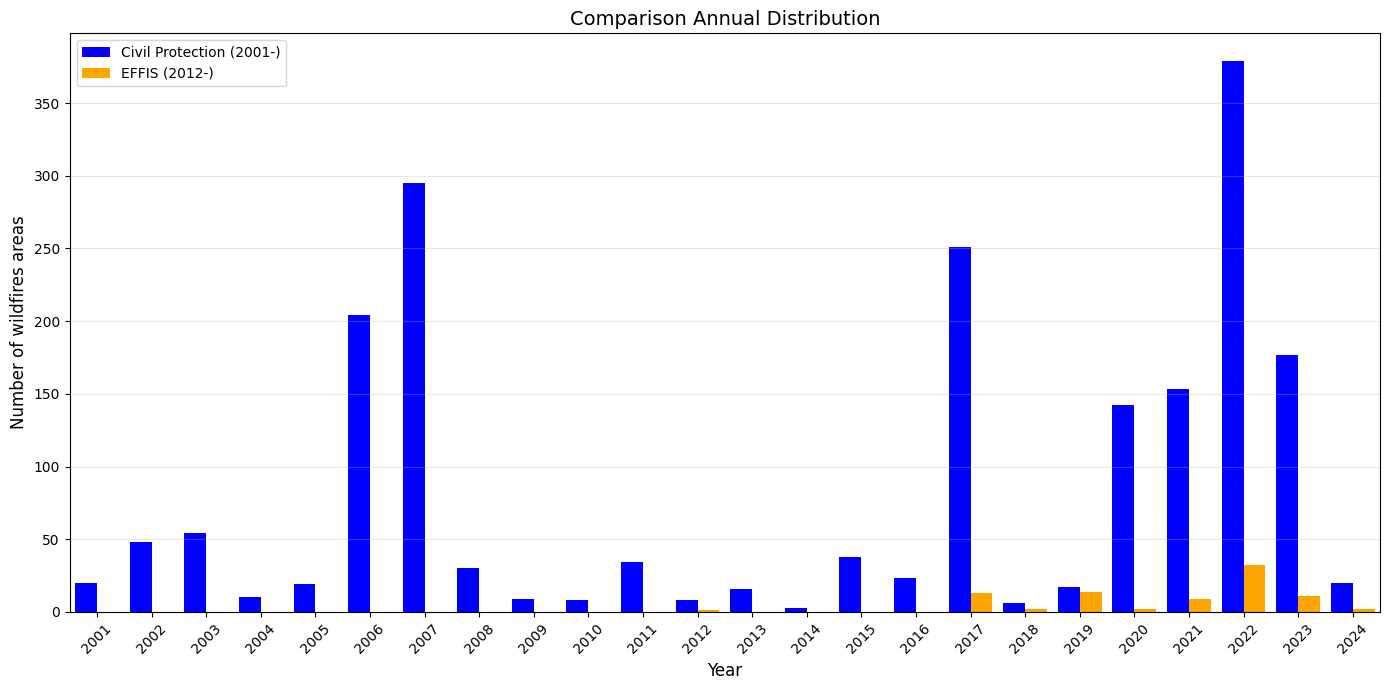


Civil Protection Area (2001-2024):
- Peak year: 2022 (379 wildfires areas)
- Annual Mean: 81.8 ± 106.5

Effis Data (2012-2024):
- Peak year: 2022 (32 wildfires areas)
- Annual Mean: 3.6 ± 7.5


In [10]:
##### CIVIL PROTECTION YEAR DISTRIBUTION FIRE AREAS #####

# Crea una copia per l'analisi temporale
piedmont_fa_temporal = piedmont_fa.copy()
print(len(piedmont_fa_temporal))
print(piedmont_fa_temporal.head(5))
# Estrai anno dal codice incendio
piedmont_fa_temporal["year"] = piedmont_fa_temporal["cod_ince"].str.extract(r'(20\d{2})').astype(float)

# Filtra anni validi e rimuovi decimali
piedmont_fa_temporal = piedmont_fa_temporal[(piedmont_fa_temporal["year"] >= 2001) & (piedmont_fa_temporal["year"] <= 2024)]
piedmont_fa_temporal["year"] = piedmont_fa_temporal["year"].astype(int)

# Calcola distribuzione annuale
year_counts = piedmont_fa_temporal["year"].value_counts().sort_index()

##### EFFIS YEAR DISTRIBUTION FIRE AREAS #####

#Conversion in year
effis_piedmont_temporal=effis_piedmont.copy()
print(len(effis_piedmont_temporal))
effis_piedmont_temporal["year"] = pd.to_datetime(
    effis_piedmont_temporal["initialdate"], 
    errors='coerce'
).dt.year

effis_piedmont_temporal = effis_piedmont_temporal.dropna(subset=["year"])
effis_piedmont_temporal = effis_piedmont_temporal[(effis_piedmont_temporal["year"] >= 2001) & (effis_piedmont_temporal["year"] <= 2024)]
effis_year_counts = effis_piedmont_temporal["year"].value_counts().sort_index()


#Complete range of years
min_year = min(year_counts.index.min(), effis_year_counts.index.min())
max_year = max(year_counts.index.max(), effis_year_counts.index.max())
all_years = np.arange(min_year, max_year + 1)

# Missing values padding
year_counts = year_counts.reindex(all_years, fill_value=0)
effis_year_counts = effis_year_counts.reindex(all_years, fill_value=0)


plt.figure(figsize=(14, 7))
bar_width = 0.4

plt.bar(
    all_years - bar_width/2,
    year_counts,
    width=bar_width,
    label='Civil Protection (2001-)',
    color='blue'
)

plt.bar(
    all_years + bar_width/2,
    effis_year_counts,
    width=bar_width,
    label='EFFIS (2012-)',
    color='orange'
)

# Formattazione grafico
plt.xticks(all_years, rotation=45)
plt.xlim(min_year - 0.5, max_year + 0.5)
plt.title("Comparison Annual Distribution", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of wildfires areas", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

##### STATISTICHE #####
print("\nCivil Protection Area (2001-2024):")
print(f"- Peak year: {year_counts.idxmax()} ({year_counts.max()} wildfires areas)")
print(f"- Annual Mean: {year_counts.mean():.1f} ± {year_counts.std():.1f}")

print("\nEffis Data (2012-2024):")
print(f"- Peak year: {effis_year_counts.idxmax()} ({effis_year_counts.max()} wildfires areas)")
print(f"- Annual Mean: {effis_year_counts.mean():.1f} ± {effis_year_counts.std():.1f}")

Taking CP Data only from 2012 (both CSV and SHP)

In [ ]:

def filter_years(df, year_col, min_year=2012, max_year=2024):
    """Filtra il dataframe mantenendo solo gli anni nel range specificato"""
    filtered = df[(df[year_col] >= min_year) & (df[year_col] <= max_year)].copy()
    filtered[year_col] = filtered[year_col].astype(int)
    return filtered

# =============================================================================
# 1. FILTRO FIRE AREAS (INC_SDO_PL_INCENDI.shp)
# =============================================================================
piedmont_fa = gpd.read_file("../shp_scarico_geoportale/INC_SDO_PL_INCENDI.shp")

# Estrazione anno dal codice incendio
piedmont_fa["year"] = piedmont_fa["cod_ince"].str.extract(r'(20\d{2})').astype(float)
piedmont_fa_filtered = filter_years(piedmont_fa, "year")

# =============================================================================
# 2. FILTRO FIRE POINTS SHAPEFILE (INC_SDO_PT_INCENDIO.shp)
# =============================================================================
piedmont_pt = gpd.read_file("../shp_scarico_geoportale/INC_SDO_PT_INCENDIO.shp")

# Estrazione anno (stesso metodo delle fire areas)
piedmont_pt["year"] = piedmont_pt["cod_ince"].str.extract(r'(20\d{2})').astype(float)
piedmont_pt_filtered = filter_years(piedmont_pt, "year")
print(piedmont_pt_filtered.head(5))

# =============================================================================
# 3. FILTRO FIRE POINTS CSV (INCENDI_T_INCENDIO.csv)
# =============================================================================
incendi_csv = pd.read_csv("../shp_scarico_geoportale/INCENDI_T_INCENDIO.csv")

# Conversione della data completa
incendi_csv["DATA_INCE"] = pd.to_datetime(incendi_csv["DATA_INCE"], errors='coerce')
incendi_csv["year"] = incendi_csv["DATA_INCE"].dt.year

# Filtraggio e pulizia
incendi_csv_filtered = filter_years(incendi_csv.dropna(subset=["year"]), "year")

# =============================================================================
# VERIFICHE E STATISTICHE
# =============================================================================
print("\nFire Areas filtrate (2012-2024):")
print(f"- N° totale: {len(piedmont_fa_filtered)}")
print(f"- Anni coperti: {piedmont_fa_filtered['year'].min()} - {piedmont_fa_filtered['year'].max()}")

print("\nFire Points (shapefile) filtrati (2012-2024):")
print(f"- N° totale: {len(piedmont_pt_filtered)}")
print(f"- Anni coperti: {piedmont_pt_filtered['year'].min()} - {piedmont_pt_filtered['year'].max()}")

print("\nFire Points (CSV) filtrati (2012-2024):")
print(f"- N° totale: {len(incendi_csv_filtered)}")
print(f"- Anni coperti: {incendi_csv_filtered['year'].min()} - {incendi_csv_filtered['year'].max()}")

   id_incendi     cod_ince                      geometry  year
4        5122  2016_000012        POINT (434167 5039907)  2016
5        5221  2016_000111        POINT (400929 5039463)  2016
6        5224  2016_000114        POINT (461861 5075838)  2016
7        5244  2016_000134        POINT (378589 4986430)  2016
8        6309  2020_000103  POINT (423762.55 4906382.03)  2020

Fire Areas filtrate (2012-2024):
- N° totale: 1233
- Anni coperti: 2012 - 2024

Fire Points (shapefile) filtrati (2012-2024):
- N° totale: 2150
- Anni coperti: 2012 - 2024

Fire Points (CSV) filtrati (2012-2024):
- N° totale: 2152
- Anni coperti: 2012 - 2024


Creating GeoJSON of Piedmont FA+FP and Piedmont FP ONLY between 2012-2024

In [ ]:
import pandas as pd
import geopandas as gpd
from pyproj import CRS
from datetime import datetime
import json

# Configurazioni
YEAR_START = 2012
YEAR_END = 2024
TARGET_CRS = "EPSG:3857"

def convert_geometry_to_multipolygon(geom):
    
    if geom.geom_type == 'Polygon':
        return {'type': 'MultiPolygon', 'coordinates': [[list(geom.exterior.coords)]]}
    return geom.__geo_interface__

def create_feature(row):
    #Making geojson as the EFFIS format
    # Formattazione data
    initial_date = row.DATA_INCE.isoformat() if pd.notnull(row.DATA_INCE) else None
    
    # Proprietà base
    properties = {
        "id": int(row.id_incendi),
        "initialdate": initial_date,
        "finaldate": None,
        "area_ha": float(row.SUP_TOT) if pd.notnull(row.SUP_TOT) else 0.0,
        "iso2": "IT",
        "iso3": "ITA",
        "country": "Italia",
        "admlvl1": "Nord-Ovest",
        "admlvl2": "Piemonte",
        "admlvl3": None,
        "admlvl5": row.LOCALITA if pd.notnull(row.LOCALITA) else None,
        "map_source": "CP_Italia",
        "broadleaved_forest_percent": 0.0,
        "coniferous_forest_percent": 0.0,
        "mixed_forest_percent": 0.0,
        "sclerophillous_vegetation_percent": 0.0,
        "transitional_vegetation_percent": 0.0,
        "other_natural_percent": 0.0,
        "agriculture_percent": 0.0,
        "artificial_percent": 0.0,
        "other_percent": 0.0,
        "natura2k_percent": 0.0,
        "noneu": False,
        "updated": datetime.now().isoformat(),
        "area_code": "EU",
        "eu_area": "EU"
    }

    #Geometry handling
    if pd.notnull(row.fa_geometry):
        properties["point_x"] = row.geometry.x
        properties["point_y"] = row.geometry.y

        return {
            "type": "Feature",
            "properties": properties,
            "geometry": convert_geometry_to_multipolygon(row.fa_geometry)
        }
    else:
        #If I have only the fire point I use it as geometry
        return {
            "type": "Feature",
            "properties": properties,
            "geometry": {
                "type": "Point",
                "coordinates": [row.geometry.x, row.geometry.y]
            }
        }

# Data loading
print("STEP 1: Data loading")

# 1. Fire Areas 
fa = gpd.read_file("../shp_scarico_geoportale/INC_SDO_PL_INCENDI.shp")[['cod_ince', 'geometry']]
fa = fa.rename(columns={'geometry': 'fa_geometry'}).set_geometry('fa_geometry')
fa['year'] = fa['cod_ince'].str.extract(r'(20\d{2})').astype(float).fillna(0).astype(int)
fa = fa[(fa.year >= YEAR_START) & (fa.year <= YEAR_END)].to_crs(TARGET_CRS)

# 2. Fire Points 
fp_shp = gpd.read_file("../shp_scarico_geoportale/INC_SDO_PT_INCENDIO.shp")[['cod_ince', 'geometry']]
fp_shp = fp_shp.set_geometry('geometry')
fp_shp['year'] = fp_shp['cod_ince'].str.extract(r'(20\d{2})').astype(float).fillna(0).astype(int)
fp_shp = fp_shp[(fp_shp.year >= YEAR_START) & (fp_shp.year <= YEAR_END)].to_crs(TARGET_CRS)

# 3. CSV
fp_csv = pd.read_csv("../shp_scarico_geoportale/INCENDI_T_INCENDIO.csv",
                    parse_dates=['DATA_INCE'],
                    dtype={'COD_FASCIC': str})
fp_csv = fp_csv.rename(columns={
    'COD_FASCIC': 'cod_ince',
    'ID_INCENDI': 'id_incendi'
})[['id_incendi', 'cod_ince', 'DATA_INCE', 'LOCALITA', 'SUP_TOT']]

#Merging datasets
print("STEP 2: Merging datasets")
merged = pd.merge(fp_csv, fp_shp, on='cod_ince', how='inner')
final_gdf = gpd.GeoDataFrame(
    pd.merge(merged, fa, on='cod_ince', how='left'),
    geometry='geometry'
).set_crs(TARGET_CRS)

#Separating Fire Points vs FirePoints+FireAreas
print("STEP 3: Separating datasets")
with_fa = final_gdf[final_gdf.fa_geometry.notna()]
without_fa = final_gdf[final_gdf.fa_geometry.isna()]

#Saving GeoJSON
print("STEP 4: Generating GeoJSON")

def save_geojson(data, path):
    features = [create_feature(row) for _, row in data.iterrows()]
    feature_collection = {
        "type": "FeatureCollection",
        "name": "incendi_piemonte",
        "crs": {
            "type": "name",
            "properties": {"name": "urn:ogc:def:crs:EPSG::3857"}
        },
        "features": features
    }
    with open(path, 'w', encoding='utf-8') as f:
        json.dump(feature_collection, f, indent=2, ensure_ascii=False)

save_geojson(with_fa, "shp_cp_2012_2024/piedmont_2012_2024_fa.geojson")
save_geojson(without_fa, "shp_cp_2012_2024/piedmont_2012_2024_fp.geojson")

print(f"Generated files: ")
print(f"- piedmont_2012_2024_fa.geojson ({len(with_fa)} features)")
print(f"- piedmont_2012_2024_fp.geojson ({len(without_fa)} features)")


STEP 1: Data loading
STEP 2: Merging datasets
STEP 3: Separating datasets
STEP 4: Generating GeoJSON
Generated files: 
- piedmont_2012_2024_fa.geojson (1231 features)
- piedmont_2012_2024_fp.geojson (919 features)


Seasonal Distribution


Seasonal Distribution Fire Areas (connected to Fire Points):
winter    363
spring    478
summer    188
autumn    202
dtype: int64

Seasonal Distribution Fire Points (without Fire Area):
winter    355
spring    314
summer    117
autumn    133
dtype: int64

Seasonal Distribution Total:
winter    718
spring    792
summer    305
autumn    335
dtype: int64


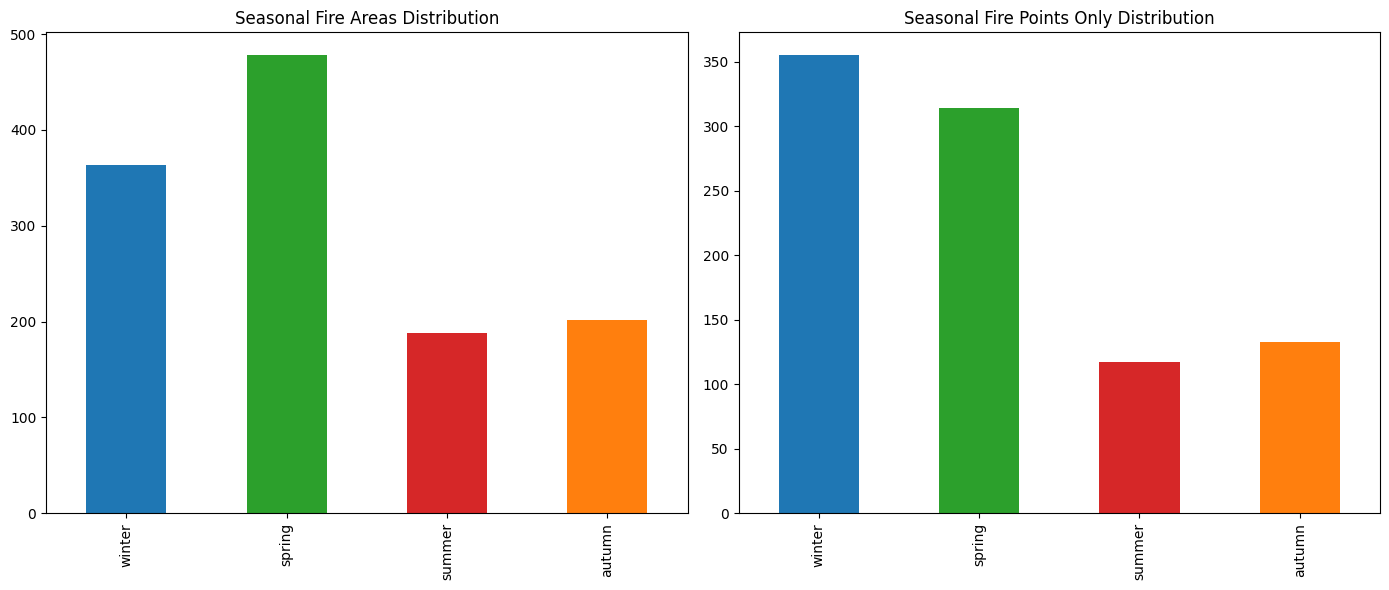

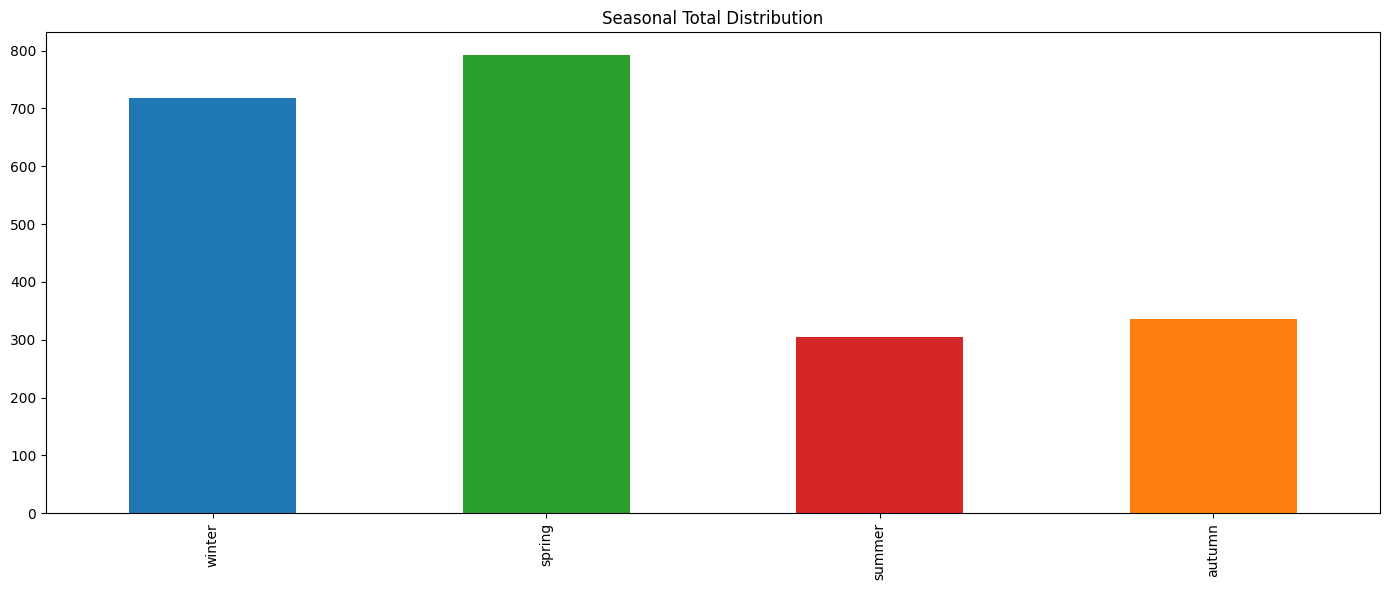

In [11]:
## SEASONAL DISTRIBUTION ##

# Caricamento dati
piedmont_fa = gpd.read_file("shp_cp_2012_2024/piedmont_2012_2024_fa.geojson")
piedmont_fp = gpd.read_file("shp_cp_2012_2024/piedmont_2012_2024_fp.geojson")


piedmont_fa["month"] = pd.to_datetime(
    piedmont_fa["initialdate"],       
    errors='coerce'
).dt.month


piedmont_fp["month"] = pd.to_datetime(
    piedmont_fp["initialdate"],        
    errors='coerce'
).dt.month

'''
piedmont_fa = piedmont_fa.dropna(subset=['month'])
piedmont_fp = piedmont_fp.dropna(subset=['month'])
'''
# seasons
seasons = {
    'winter': [12, 1, 2],
    'spring': [3, 4, 5],
    'summer': [6, 7, 8],
    'autumn': [9, 10, 11]
}

#FA 
season_counts_fa = {}
for season, months in seasons.items():
    mask = piedmont_fa["month"].isin(months)
    season_counts_fa[season] = mask.sum()  

#FP Only
season_counts_fp = {}
for season, months in seasons.items():
    mask = piedmont_fp["month"].isin(months)
    season_counts_fp[season] = mask.sum()

#total
season_counts= {}
for season, months in seasons.items():
    mask_fa = piedmont_fa["month"].isin(months)
    mask_fp = piedmont_fp["month"].isin(months)
    season_counts[season] = mask_fa.sum() + mask_fp.sum() 

print("\nSeasonal Distribution Fire Areas (connected to Fire Points):")
print(pd.Series(season_counts_fa))

print("\nSeasonal Distribution Fire Points (without Fire Area):")
print(pd.Series(season_counts_fp))

print("\nSeasonal Distribution Total:")
print(pd.Series(season_counts))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Fire Areas
pd.Series(season_counts_fa).plot(
    kind='bar', 
    color=['#1f77b4', '#2ca02c', '#d62728', '#ff7f0e'],
    ax=ax1,
    title='Seasonal Fire Areas Distribution'
)

# Fire Points
pd.Series(season_counts_fp).plot(
    kind='bar', 
    color=['#1f77b4', '#2ca02c', '#d62728', '#ff7f0e'],
    ax=ax2,
    title='Seasonal Fire Points Only Distribution'
)

plt.tight_layout()
plt.show()

fig1, ax = plt.subplots(figsize=(14, 6))

pd.Series(season_counts).plot(
    kind='bar', 
    color=['#1f77b4', '#2ca02c', '#d62728', '#ff7f0e'],
    ax=ax,
    title='Seasonal Total Distribution'
)

plt.tight_layout()
plt.show()


**COMMENT**: The fire points without fire area are so as fire is very small, in fact in the csv each fire point that matches a fire area has a very large area, which matches on the map. So I try to see the threshold within which areas are fire points.

**EDIT**: Not completely wrong but there are points that have area_ha>100, the majority of big areas have the polygon and not only the fire point. But in the middle section, there are many fire with area between 10^-2 and 10^1 that can have or not polygon

Fire Areas (FA) Statistics:
count    1231.000000
mean       21.620877
std       158.735105
min         0.000000
25%         0.120000
50%         0.480000
75%         2.570000
max      4018.570000
Name: area_ha, dtype: float64

Fire Points (FP) Statistics:
count    919.00000
mean       1.28951
std        5.59845
min        0.00000
25%        0.08000
50%        0.27000
75%        0.89500
max      122.60000
Name: area_ha, dtype: float64


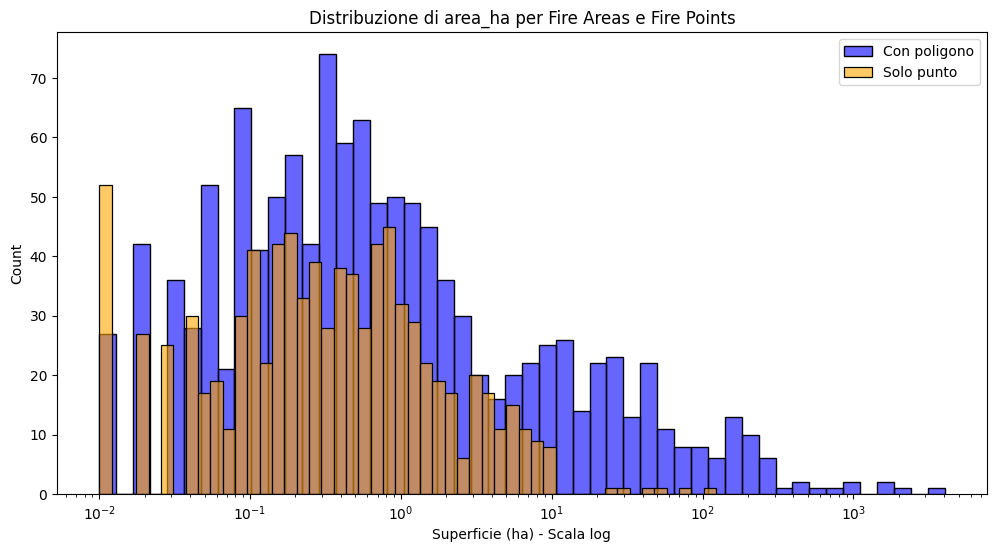

In [12]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricare i dati
fa = gpd.read_file("shp_cp_2012_2024/piedmont_2012_2024_fa.geojson")
fp = gpd.read_file("shp_cp_2012_2024/piedmont_2012_2024_fp.geojson")

# Assicurarsi che 'area_ha' sia numerico
fa["area_ha"] = pd.to_numeric(fa["area_ha"], errors="coerce")
fp["area_ha"] = pd.to_numeric(fp["area_ha"], errors="coerce")

# 1. Statistiche descrittive
print("Fire Areas (FA) Statistics:")
print(fa["area_ha"].describe())

print("\nFire Points (FP) Statistics:")
print(fp["area_ha"].describe())

# 2. Istogrammi
plt.figure(figsize=(12,6))
sns.histplot(fa["area_ha"], bins=50, color="blue", alpha=0.6, label="Con poligono", log_scale=True)
sns.histplot(fp["area_ha"], bins=50, color="orange", alpha=0.6, label="Solo punto", log_scale=True)
plt.legend()
plt.title("Distribuzione di area_ha per Fire Areas e Fire Points")
plt.xlabel("Superficie (ha) - Scala log")
plt.show()




Seasonal Burned Area (Fire Areas connected to Fire Points):
winter     5733.63
spring     8333.28
summer      623.64
autumn    11924.75
dtype: float64

Seasonal Burned Area (Fire Points without Fire Area):
winter    573.91
spring    346.93
summer    141.81
autumn    122.41
dtype: float64

Seasonal Burned Area Total:
winter     6307.54
spring     8680.21
summer      765.45
autumn    12047.16
dtype: float64


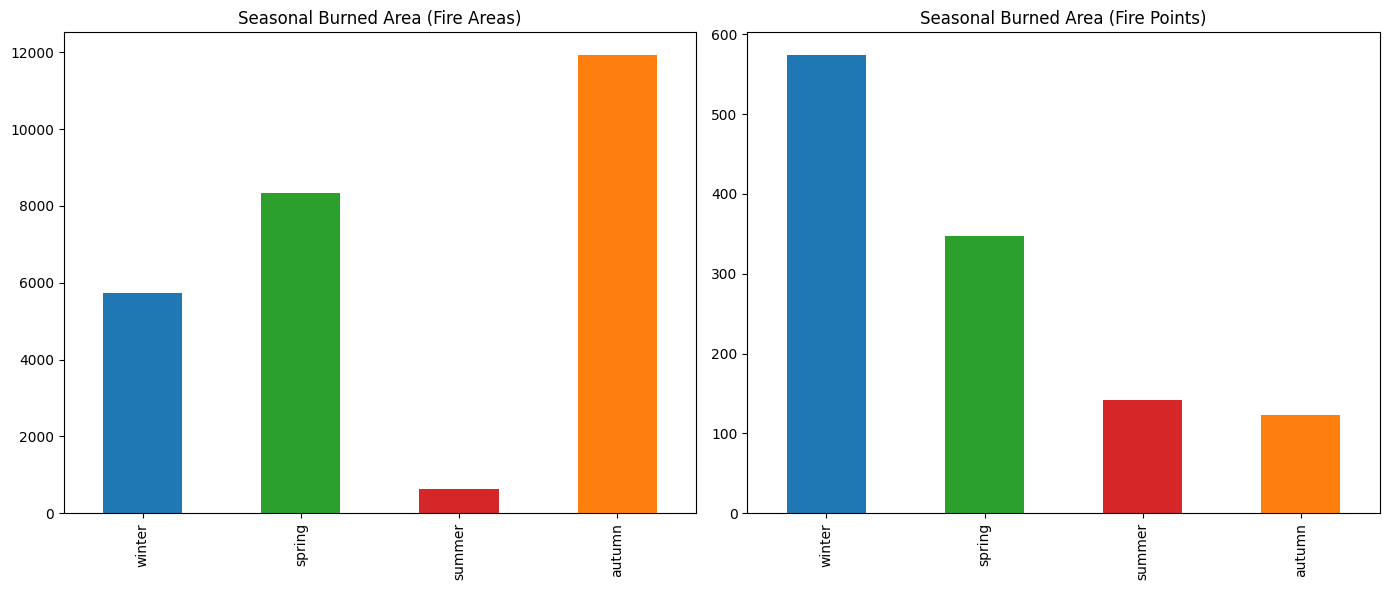

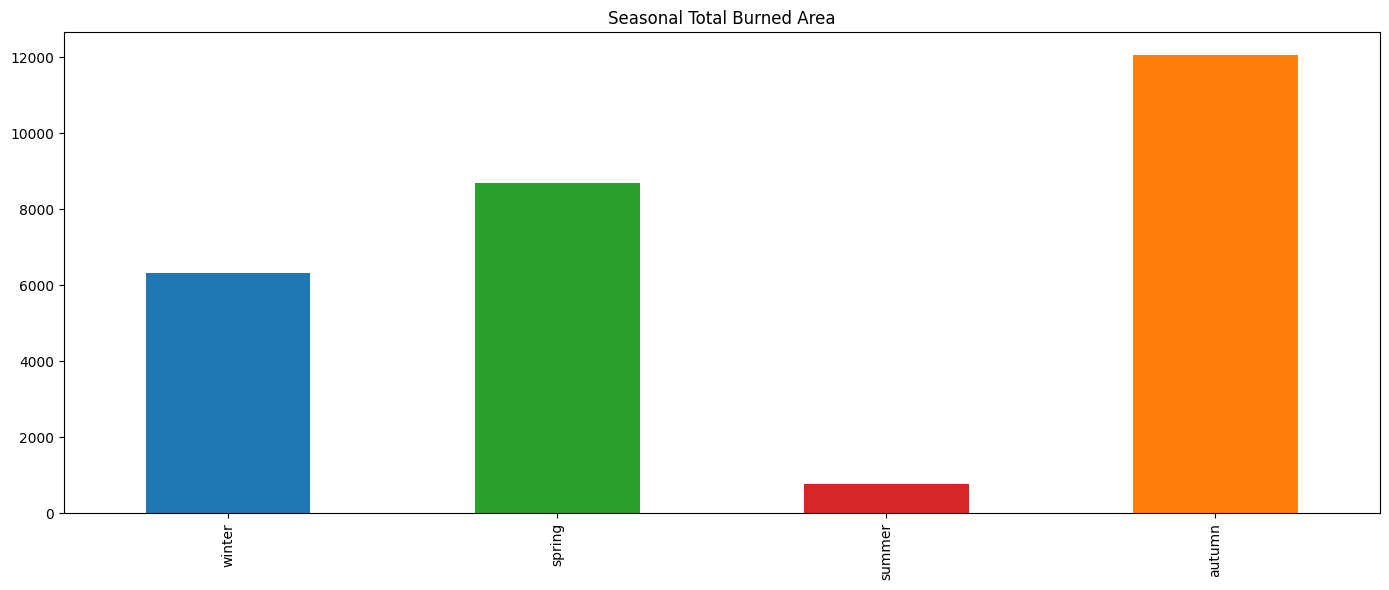

In [13]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Caricamento dati
piedmont_fa = gpd.read_file("shp_cp_2012_2024/piedmont_2012_2024_fa.geojson")
piedmont_fp = gpd.read_file("shp_cp_2012_2024/piedmont_2012_2024_fp.geojson")

# Convertire le date in mesi
piedmont_fa["month"] = pd.to_datetime(piedmont_fa["initialdate"], errors='coerce').dt.month
piedmont_fp["month"] = pd.to_datetime(piedmont_fp["initialdate"], errors='coerce').dt.month

# Definizione delle stagioni
seasons = {
    'winter': [12, 1, 2],
    'spring': [3, 4, 5],
    'summer': [6, 7, 8],
    'autumn': [9, 10, 11]
}

# Inizializzare i dizionari per la somma delle aree bruciate
season_area_fa = {season: 0 for season in seasons}
season_area_fp = {season: 0 for season in seasons}
season_area_total = {season: 0 for season in seasons}

# Sommare l'area bruciata per stagione
for season, months in seasons.items():
    season_area_fa[season] = piedmont_fa.loc[piedmont_fa["month"].isin(months), "area_ha"].sum()
    season_area_fp[season] = piedmont_fp.loc[piedmont_fp["month"].isin(months), "area_ha"].sum()
    season_area_total[season] = season_area_fa[season] + season_area_fp[season]

# Stampare i risultati
print("\nSeasonal Burned Area (Fire Areas connected to Fire Points):")
print(pd.Series(season_area_fa))

print("\nSeasonal Burned Area (Fire Points without Fire Area):")
print(pd.Series(season_area_fp))

print("\nSeasonal Burned Area Total:")
print(pd.Series(season_area_total))

# Creazione dei grafici
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Fire Areas
pd.Series(season_area_fa).plot(
    kind='bar', 
    color=['#1f77b4', '#2ca02c', '#d62728', '#ff7f0e'],
    ax=ax1,
    title='Seasonal Burned Area (Fire Areas)'
)

# Fire Points
pd.Series(season_area_fp).plot(
    kind='bar', 
    color=['#1f77b4', '#2ca02c', '#d62728', '#ff7f0e'],
    ax=ax2,
    title='Seasonal Burned Area (Fire Points)'
)

plt.tight_layout()
plt.show()

fig1, ax = plt.subplots(figsize=(14, 6))

pd.Series(season_area_total).plot(
    kind='bar', 
    color=['#1f77b4', '#2ca02c', '#d62728', '#ff7f0e'],
    ax=ax,
    title='Seasonal Total Burned Area'
)

plt.tight_layout()
plt.show()
